In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, precision_score

from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
RANDOM_SEED = 42

In [2]:
DATA_DIR = '.'
df_train = pd.read_csv(DATA_DIR+'/train.csv')
df_test = pd.read_csv(DATA_DIR+'/test.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [4]:
df_train.sample(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
21833,2819,08JAN2014,GRD,M,24,N,N,0,0,-1.639263,0,50,2,3,30000,4,1,N,1
55783,46862,23FEB2014,SCH,M,54,Y,Y,0,0,-2.461393,1,80,2,3,50000,4,1,N,0
21183,1978,07JAN2014,SCH,F,36,N,N,1,1,-2.232811,1,50,2,3,15000,1,4,N,0
24588,86593,03APR2014,GRD,M,23,N,N,1,1,-1.894793,4,80,2,3,25000,4,1,N,0
73215,49116,26FEB2014,SCH,F,49,N,N,0,0,-1.998676,1,70,1,3,60000,1,3,N,0


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36349 entries, 0 to 36348
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         36349 non-null  int64  
 1   app_date          36349 non-null  object 
 2   education         36178 non-null  object 
 3   sex               36349 non-null  object 
 4   age               36349 non-null  int64  
 5   car               36349 non-null  object 
 6   car_type          36349 non-null  object 
 7   decline_app_cnt   36349 non-null  int64  
 8   good_work         36349 non-null  int64  
 9   score_bki         36349 non-null  float64
 10  bki_request_cnt   36349 non-null  int64  
 11  region_rating     36349 non-null  int64  
 12  home_address      36349 non-null  int64  
 13  work_address      36349 non-null  int64  
 14  income            36349 non-null  int64  
 15  sna               36349 non-null  int64  
 16  first_time        36349 non-null  int64 

In [6]:
df_test.sample(3)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
6405,88317,04APR2014,SCH,F,32,N,N,3,0,-1.399919,7,60,2,3,25000,2,2,N
32143,53294,02MAR2014,GRD,F,51,N,N,0,0,-1.327574,2,50,1,2,20000,1,3,N
25436,1367,05JAN2014,GRD,M,28,Y,Y,0,0,-1.745139,0,60,1,2,30000,1,2,N


In [7]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24354 entries, 0 to 24353
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  24354 non-null  int64  
 1   default    24354 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 380.7 KB


In [8]:
sample_submission.sample(4)

,client_id,default
21677,59090,0.095918
4049,85989,0.735543
1846,12881,0.490820
6834,35820,0.065259


In [9]:
df_train['sample']=1
df_test['sample']=0
df_test['default']=-1
data = df_test.append(df_train, sort=False).reset_index(drop=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

### Описание столбцов

| feature | описание | тип |
| :- | :- | :- |
| client_id | идентификатор клиента | без типа |
| app_date | дата подачи заявки | дата |
| education	|уровень образования: School, graduate, e t.c | категорийная |
| sex	| пол заемщика | бинарная |
| age	| возраст заемщика | числовая |
| car	| флаг наличия автомобиля | бинарная |
| car_type	| флаг автомобиля иномарки  | бинарная |
| decline_app_cnt	| количество отказанных прошлых заявок | числовая |
| good_work	| флаг наличия “хорошей” работы | бинарная |
| score_bki* | скоринговый балл по данным из БКИ | числовая |
| bki_request_cnt	| количество запросов в БКИ  | числовая |
| region_rating* | рейтинг региона  | категорийная |
| home_address	| категоризатор домашнего адреса | категорийная |
| work_address	| категоризатор рабочего адреса | категорийная |
| income	| доход заемщика | числовая |
| sna* | связь заемщика с клиентами банка | категорийная |
| first_time | давность наличия информации о заемщике | категорийная |
|foreign_passport	| наличие загранпаспорта | бинарная |
| _sample_ | _1 если train data, 0 если test data_ | бинарная |
| default	| флаг дефолта по кредиту, -1 если train data | бинарная |



начинаем очистку данных

In [11]:
data.isna().sum()

client_id             0
app_date              0
education           478
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
sample                0
default               0
dtype: int64

In [12]:
num_cols = ['age','decline_app_cnt', 'score_bki',  'bki_request_cnt', 'income']
bin_cols = ['sex', 'car', 'car_type', 'good_work',  'foreign_passport']
cat_cols = ['education', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time']
time_cols = ['app_date']

заполняем пропуски

In [13]:
def viz_counter_barh(df, column, title, max_values=0):
    """
    Визуализация количества значений в ДФ, Value_counts, 
    горизонтальные столбцы
    df - датафрейм, column - столбец, title - подпись
    max_values - максимальное количество значений для отображения, 0 - все
    """
    if max_values > 0:
        col_values = df[column].value_counts().nlargest(
            max_values).sort_values(ascending=True)
    else:
        col_values = df[column].value_counts(ascending=True)
    
    fig, ax = plt.subplots()
    plt.rcParams['figure.figsize'] = (8, 10)
    plt.figure 
    ax = col_values.plot(kind='barh', title=title)
    ax.set_xlim(0, col_values.max()*1.15)
    
    for i, v in enumerate(col_values):
        plt.text(v, i, " "+str(v), va='center')
    
    plt.show()
    
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x='default', y=column, 
                data=data,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

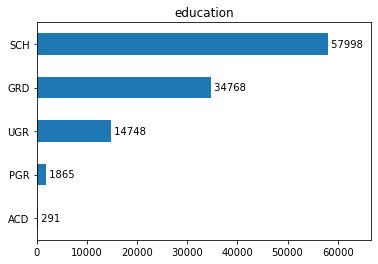

In [14]:
viz_counter_barh(data, 'education','education')

In [15]:
data.education = data.education.fillna('UNK')

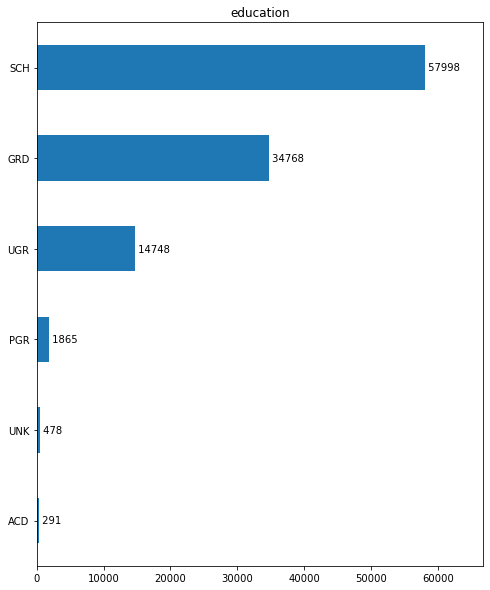

In [16]:
viz_counter_barh(data, 'education','education')

начнем с дат. получим отдельно месяц и день недели. и добавим эти колонки в категориальные признаки

In [17]:
data['app_date'] = pd.to_datetime(data['app_date'], format='%d%b%Y')

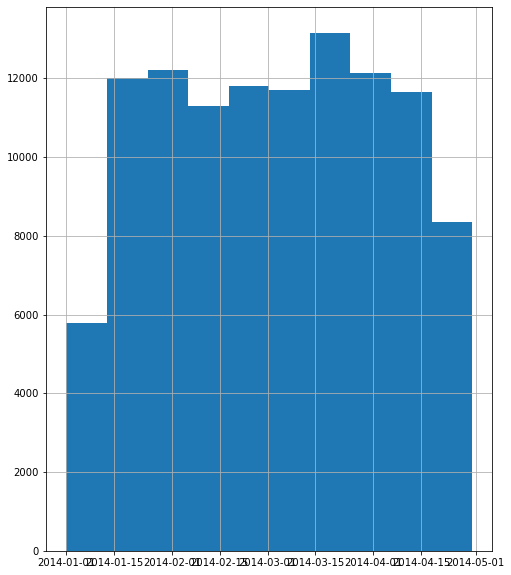

In [18]:
data['app_date'].hist()

In [19]:
data['app_date'].describe()

count                  110148
unique                    120
top       2014-03-18 00:00:00
freq                     1491
first     2014-01-01 00:00:00
last      2014-04-30 00:00:00
Name: app_date, dtype: object

In [20]:
data['day_of_week'] = data['app_date'].dt.dayofweek
if 'day_of_week' not in cat_cols :num_cols.append('day_of_week')

In [21]:
data['app_month'] = data['app_date'].dt.month
if 'app_month' not in cat_cols :num_cols.append('app_month')

Числовые признаки

num_cols = ['age','decline_app_cnt', 'score_bki',  'bki_request_cnt', 'income']

данные требуется нормализовать, т.к. большенство графиков смещены

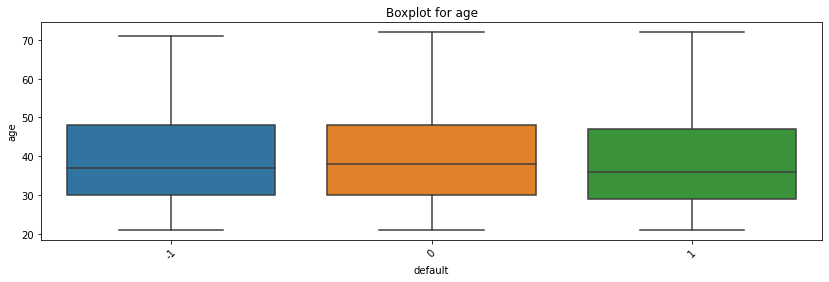

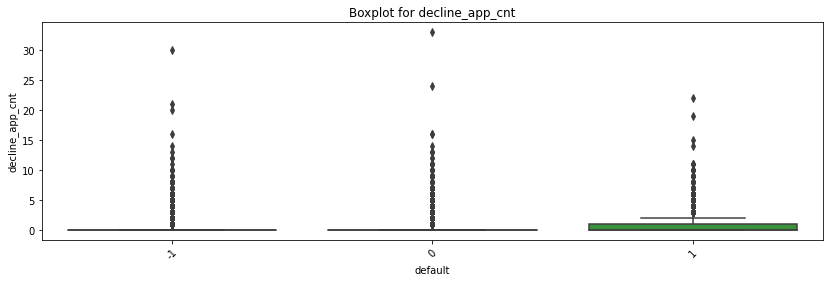

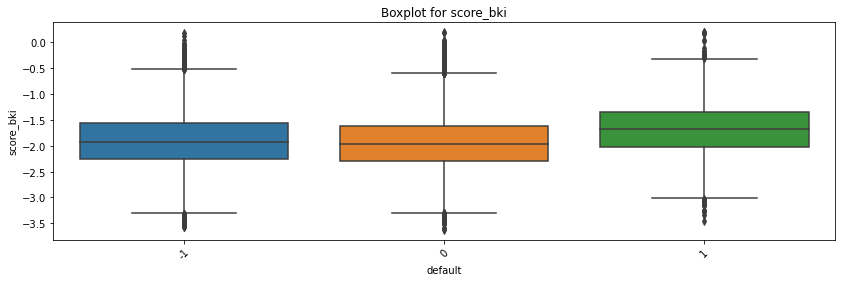

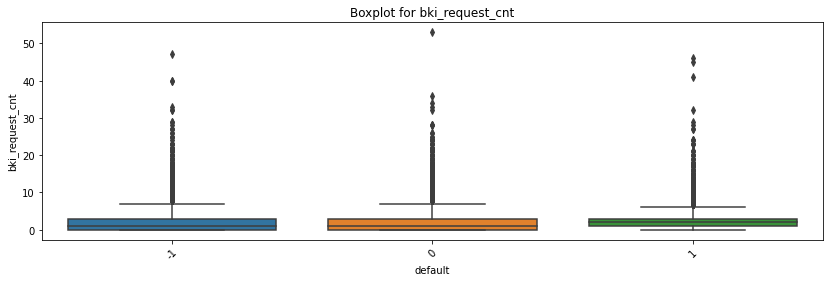

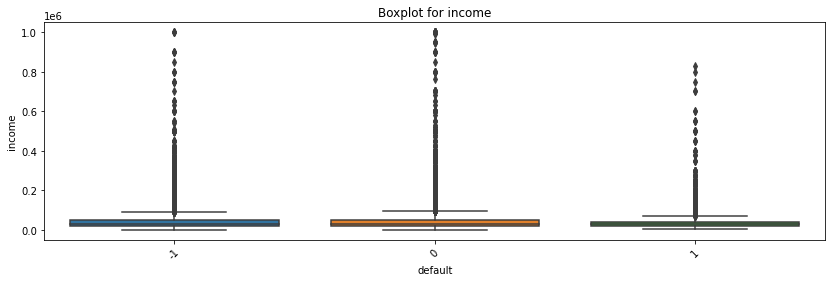

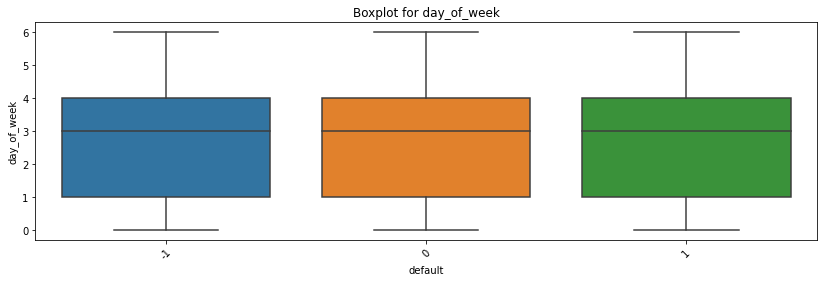

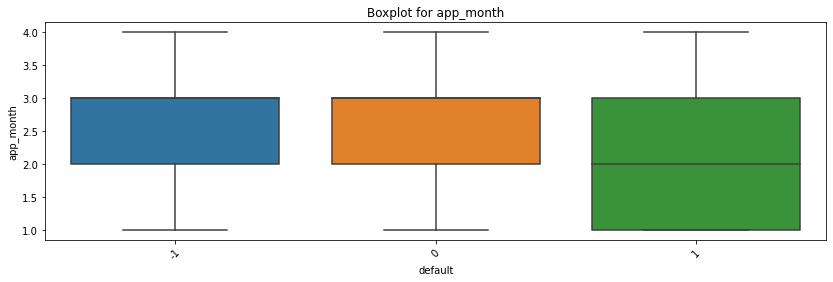

In [22]:
for c in num_cols:
    get_boxplot(c)

count    110148.000000
mean         39.249410
std          11.518063
min          21.000000
25%          30.000000
50%          37.000000
75%          48.000000
max          72.000000
Name: age, dtype: float64

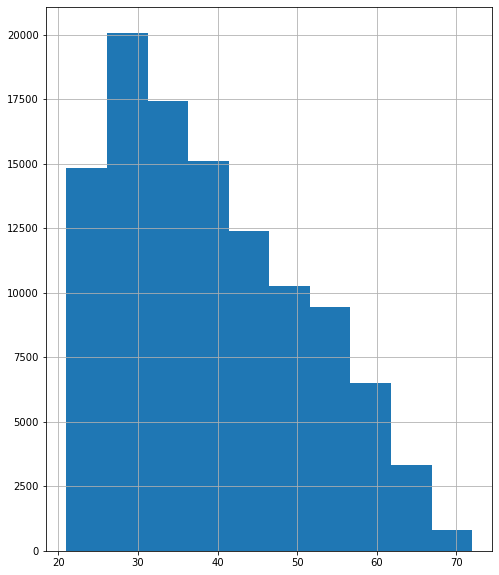

In [23]:
data.age.hist()
data.age.describe()

count    110148.000000
mean          0.273205
std           0.799099
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          33.000000
Name: decline_app_cnt, dtype: float64

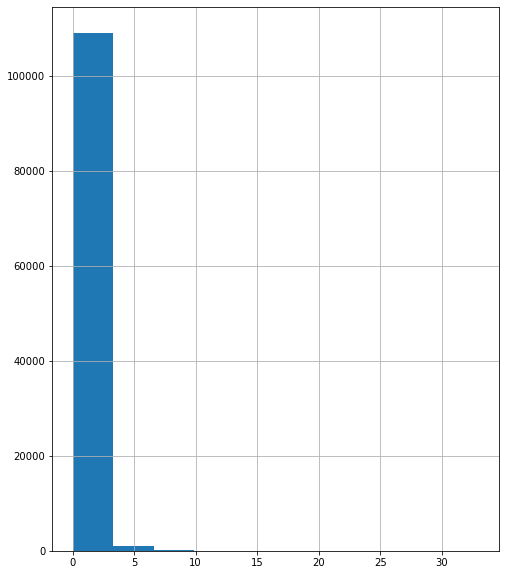

In [24]:
data.decline_app_cnt.hist()
data.decline_app_cnt.describe()

count    110148.000000
mean         -1.904535
std           0.499397
min          -3.624586
25%          -2.260434
50%          -1.920823
75%          -1.567888
max           0.199773
Name: score_bki, dtype: float64

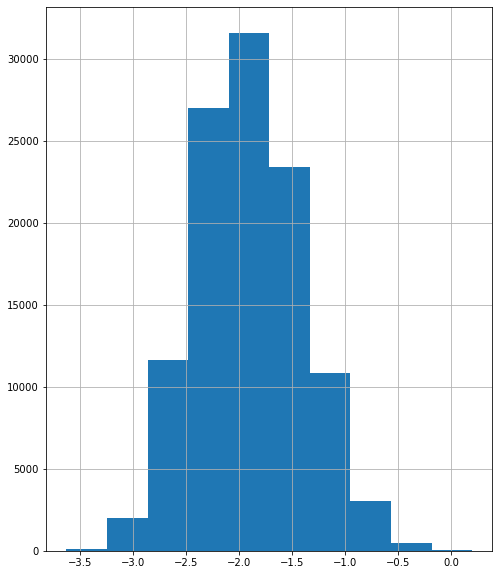

In [25]:
data.score_bki.hist()
data.score_bki.describe()

count    110148.000000
mean          2.005002
std           2.266926
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          53.000000
Name: bki_request_cnt, dtype: float64

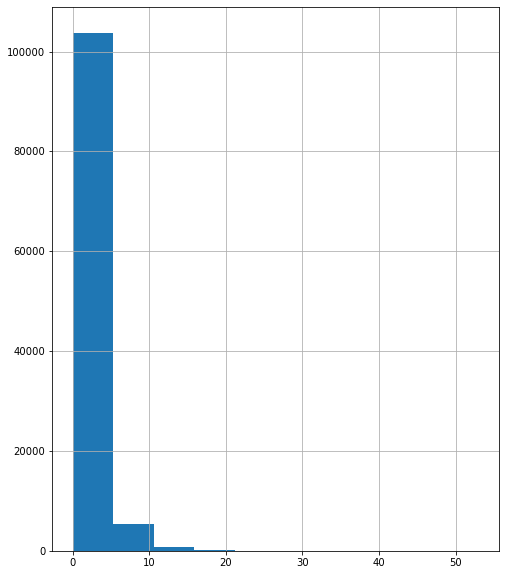

In [26]:
data.bki_request_cnt.hist()
data.bki_request_cnt.describe()

count     110148.000000
mean       41012.648537
std        45399.735051
min         1000.000000
25%        20000.000000
50%        30000.000000
75%        48000.000000
max      1000000.000000
Name: income, dtype: float64

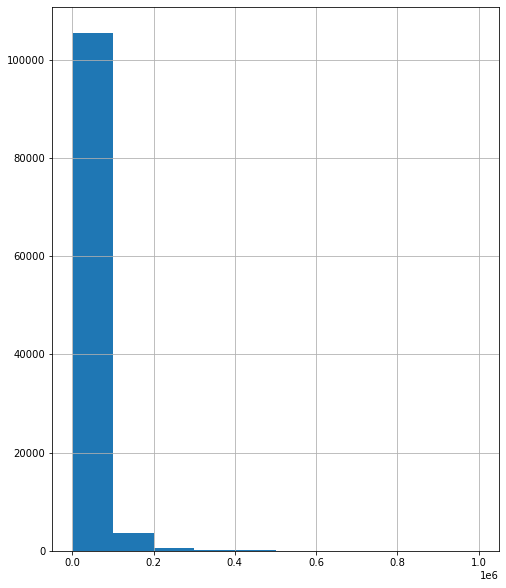

In [27]:
data.income.hist()
data.income.describe()

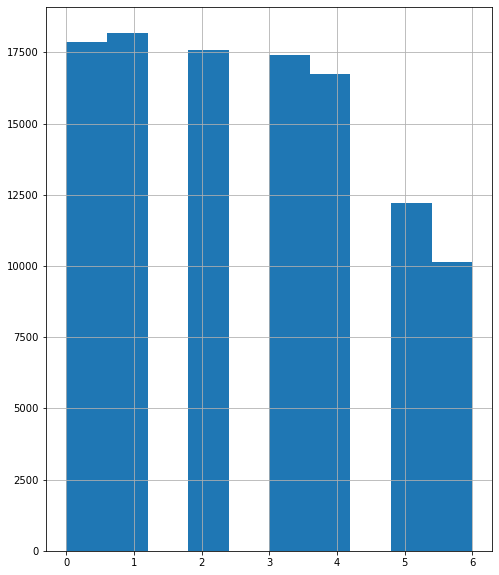

In [28]:
data.day_of_week.hist()

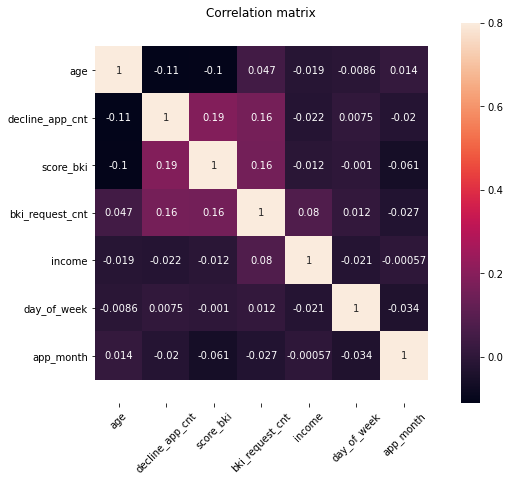

In [29]:
corrmat = data[num_cols].corr()
f, ax = plt.subplots(figsize=(12, 7))
chart = sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
bottom, top = chart.get_ylim()
plt.title('Correlation matrix')
ax.set_ylim(bottom + 0.5, top - 0.5);

четких корреляций не наблюдается.

бинарные признаки

bin_cols = ['sex', 'car', 'car_type', 'good_work',  'foreign_passport', 'default']


переведем все буквенные обозначения в числовые

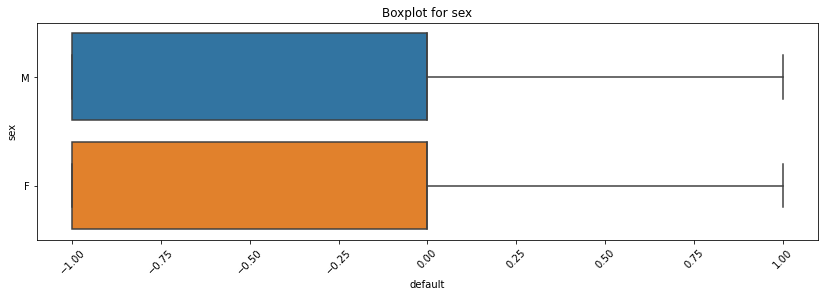

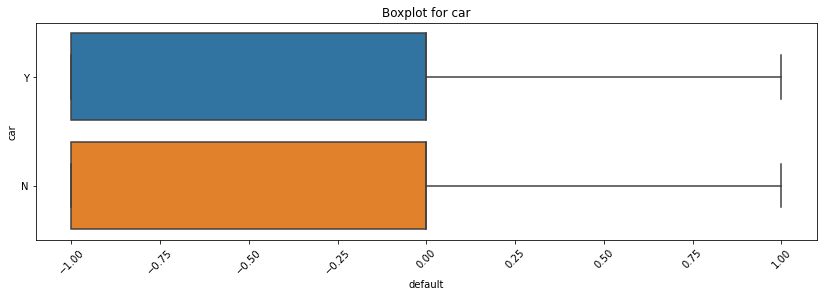

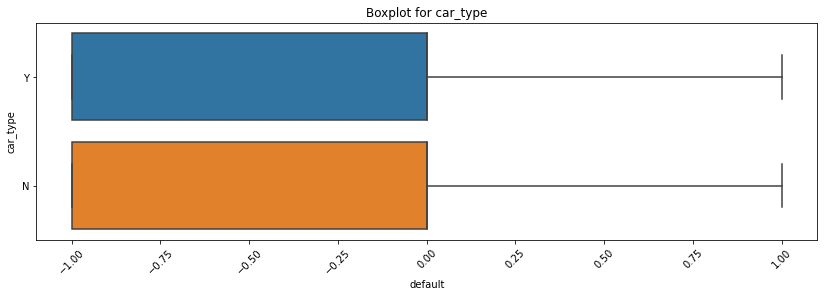

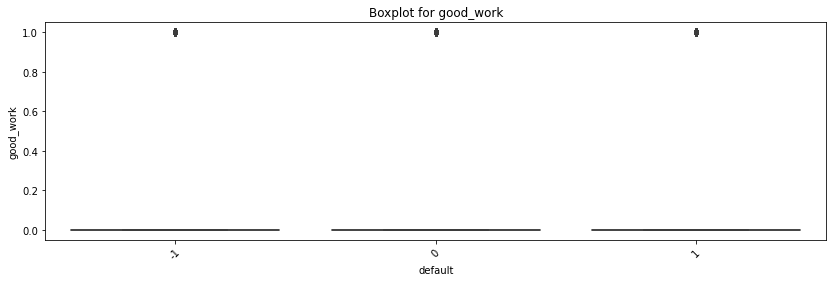

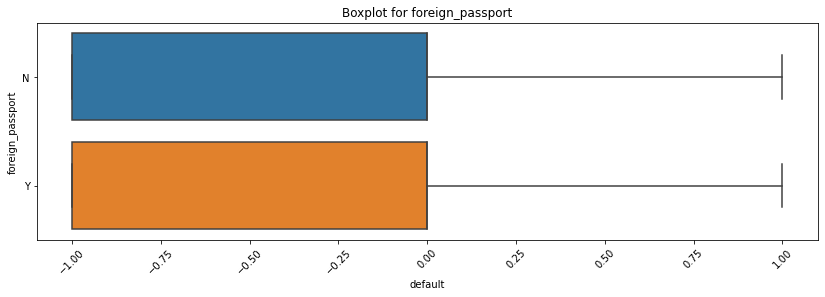

In [30]:
for c in bin_cols:
    get_boxplot(c)

In [31]:
label_encoder = LabelEncoder()

for column in bin_cols:
    data[column] = label_encoder.fit_transform(data[column])
    
# убедимся в преобразовании    
data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,home_address,work_address,income,sna,first_time,foreign_passport,sample,default,day_of_week,app_month
0,74835,2014-03-22,GRD,1,29,1,1,0,0,-2.271884,...,1,2,50000,1,4,0,0,-1,5,3
1,17527,2014-01-24,SCH,0,39,0,0,5,0,-1.504999,...,1,2,5000,4,3,0,0,-1,4,1
2,75683,2014-03-23,UGR,1,50,1,1,0,0,-1.691339,...,1,2,30000,1,3,1,0,-1,6,3
3,26883,2014-02-03,SCH,1,56,0,0,0,0,-2.374182,...,1,2,17000,1,3,0,0,-1,0,2
4,28862,2014-02-04,GRD,0,38,0,0,0,0,-2.487502,...,2,3,120000,1,3,0,0,-1,1,2


count    110148.000000
mean          0.438610
std           0.496219
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: sex, dtype: float64

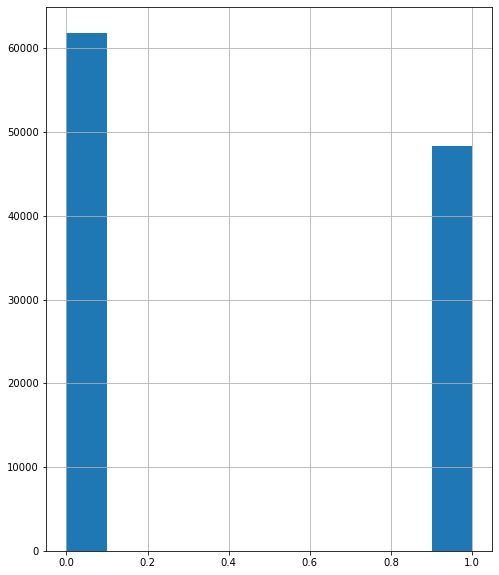

In [32]:
data.sex.hist()
data.sex.describe()

count    110148.000000
mean          0.325544
std           0.468580
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: car, dtype: float64

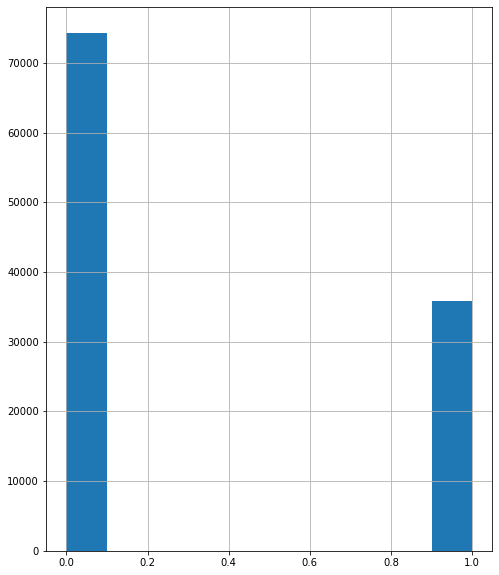

In [33]:
data.car.hist()
data.car.describe()


count    110148.000000
mean          0.190725
std           0.392875
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: car_type, dtype: float64

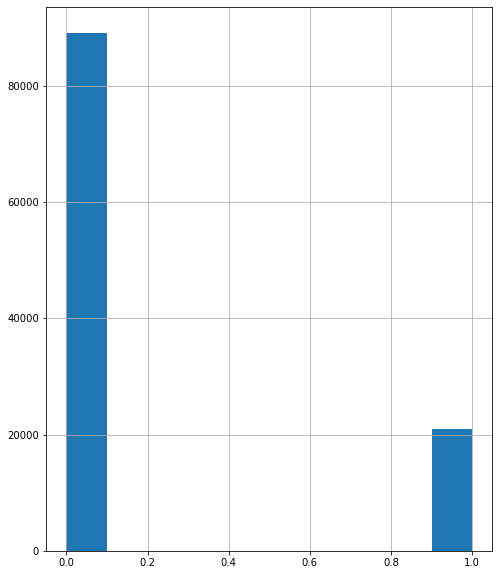

In [34]:
data.car_type.hist()
data.car_type.describe()

переменную про тип автомобилей надо изменить и разделить отсутствие машины и отечественные авто

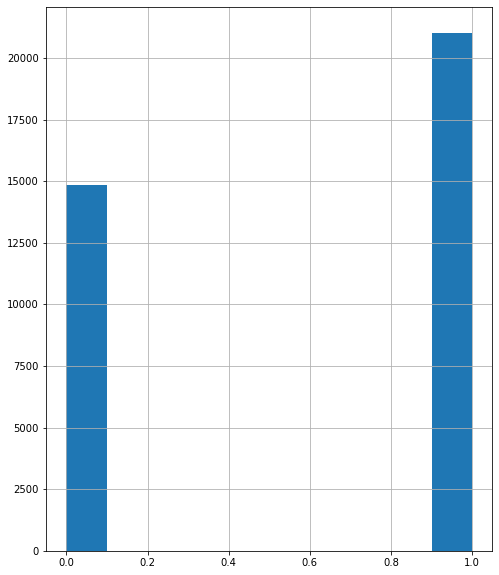

In [35]:
data[data.car == 1].car_type.hist()

In [36]:
data.loc[data.car == 0, 'car_type'] = 2

переносим car_type из бинарных признаков в категориальные 

In [37]:
bin_cols.remove('car_type')
cat_cols.append('car_type')

count    110148.000000
mean          0.165514
std           0.371645
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: good_work, dtype: float64

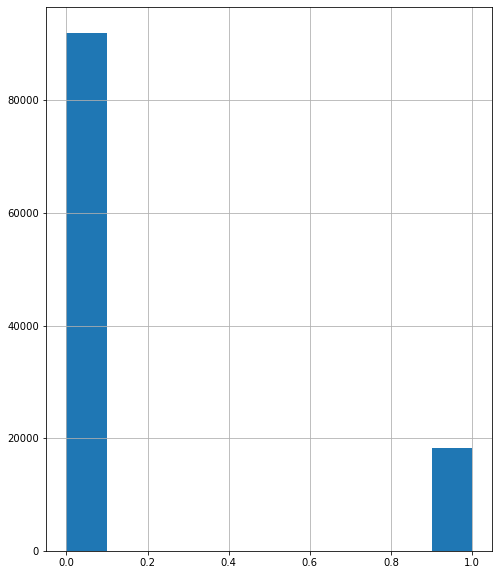

In [38]:
data['good_work'].hist()
data['good_work'].describe()

count    110148.000000
mean          0.149136
std           0.356224
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: foreign_passport, dtype: float64

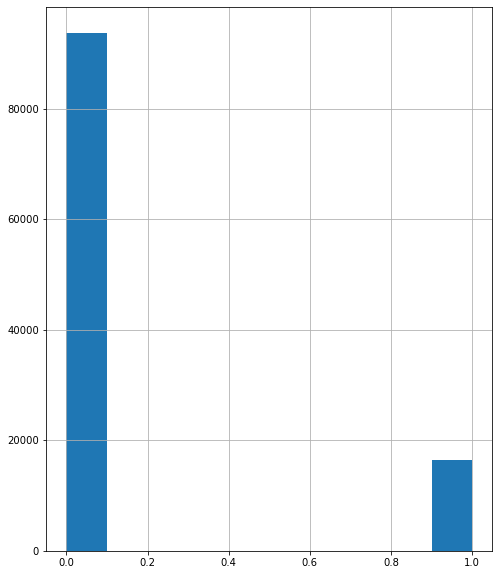

In [39]:
data['foreign_passport'].hist()
data['foreign_passport'].describe()

In [40]:
data[bin_cols].corr()

,sex,car,good_work,foreign_passport
sex,1.000000,0.277470,-0.044026,0.085924
car,0.277470,1.000000,0.001565,0.106893
good_work,-0.044026,0.001565,1.000000,0.048491
foreign_passport,0.085924,0.106893,0.048491,1.000000


категориальные признаки

cat_cols = ['education', 'region_rating', 'home_address', 'work_address', 'sna', 'first_time']

переведем все буквенные обозначения в числовые

In [41]:
for column in cat_cols:
    data[column] = label_encoder.fit_transform(data[column])
    
data.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,...,home_address,work_address,income,sna,first_time,foreign_passport,sample,default,day_of_week,app_month
0,74835,2014-03-22,1,1,29,1,1,0,0,-2.271884,...,0,1,50000,0,3,0,0,-1,5,3
1,17527,2014-01-24,3,0,39,0,2,5,0,-1.504999,...,0,1,5000,3,2,0,0,-1,4,1
2,75683,2014-03-23,4,1,50,1,1,0,0,-1.691339,...,0,1,30000,0,2,1,0,-1,6,3
3,26883,2014-02-03,3,1,56,0,2,0,0,-2.374182,...,0,1,17000,0,2,0,0,-1,0,2
4,28862,2014-02-04,1,0,38,0,2,0,0,-2.487502,...,1,2,120000,0,2,0,0,-1,1,2


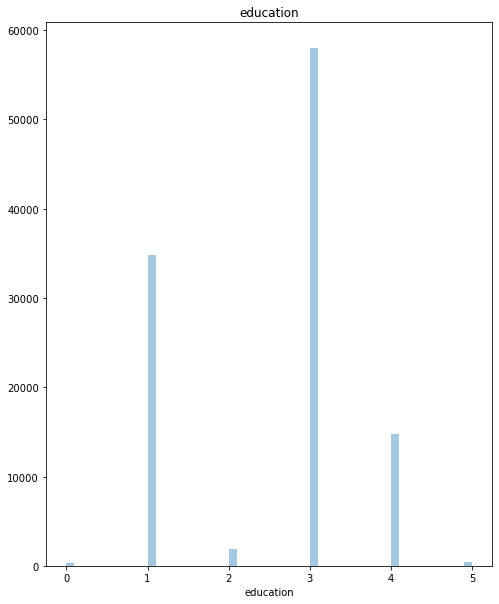

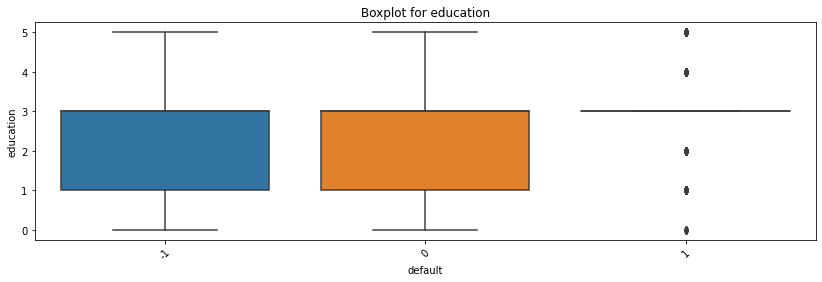

count    110148.000000
mean          2.486418
std           1.091236
min           0.000000
25%           1.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: education, dtype: float64


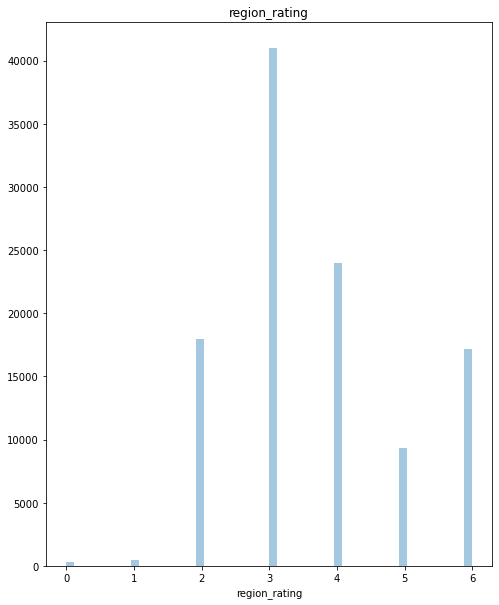

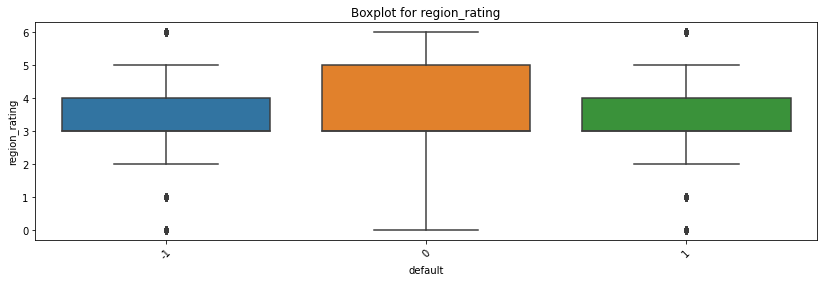

count    110148.000000
mean          3.675119
std           1.306592
min           0.000000
25%           3.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: region_rating, dtype: float64


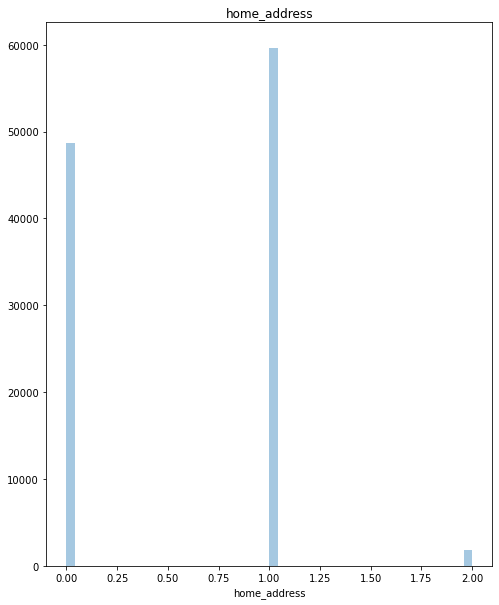

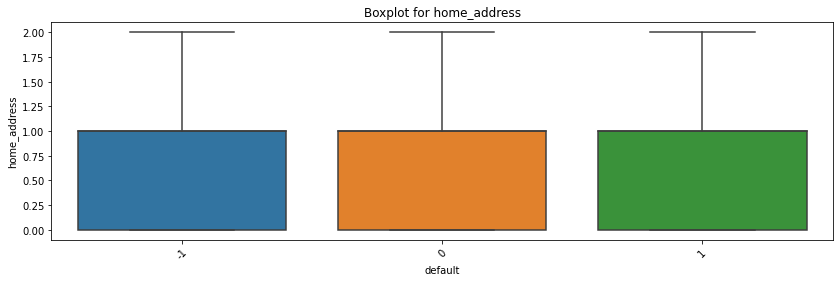

count    110148.000000
mean          0.574945
std           0.527562
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           2.000000
Name: home_address, dtype: float64


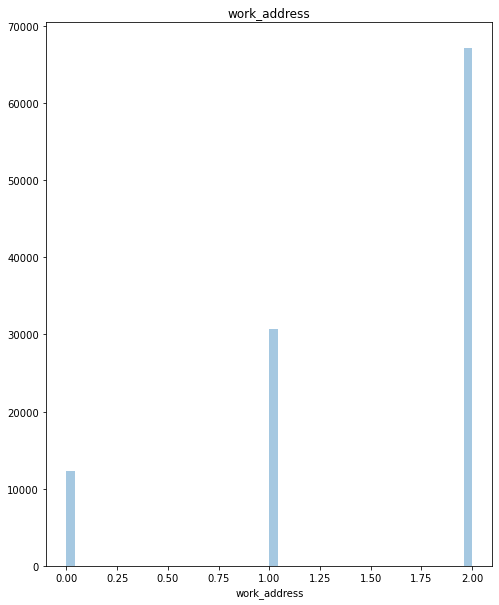

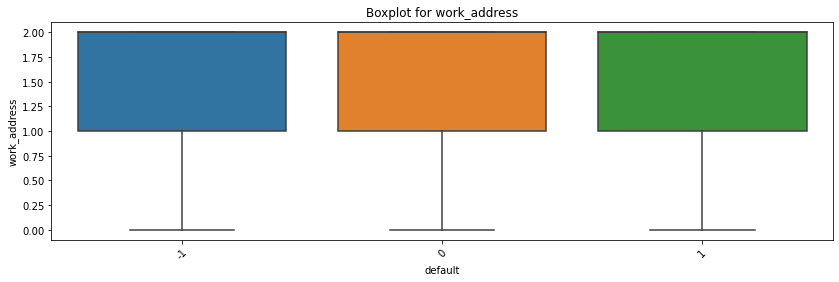

count    110148.000000
mean          1.497867
std           0.687651
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: work_address, dtype: float64


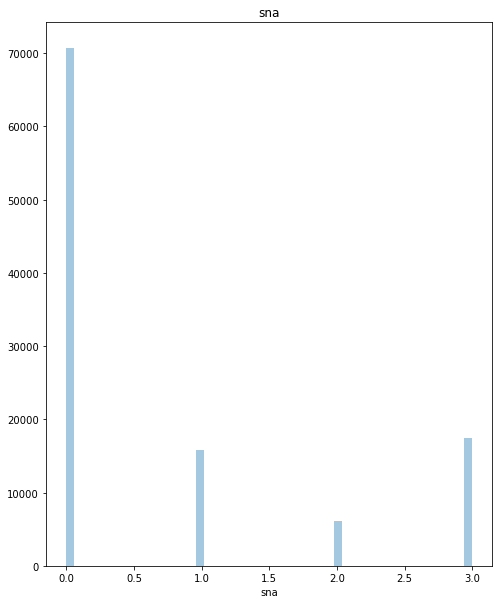

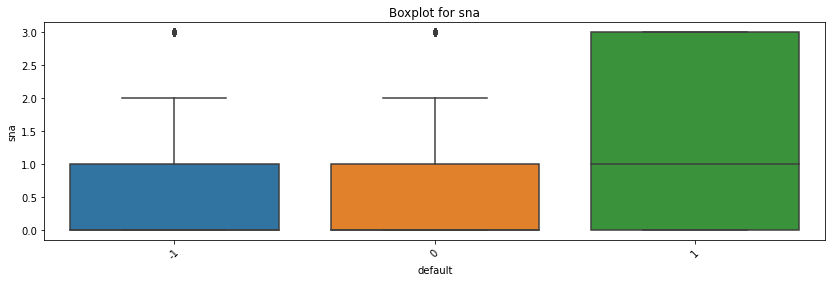

count    110148.000000
mean          0.731588
std           1.122652
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           3.000000
Name: sna, dtype: float64


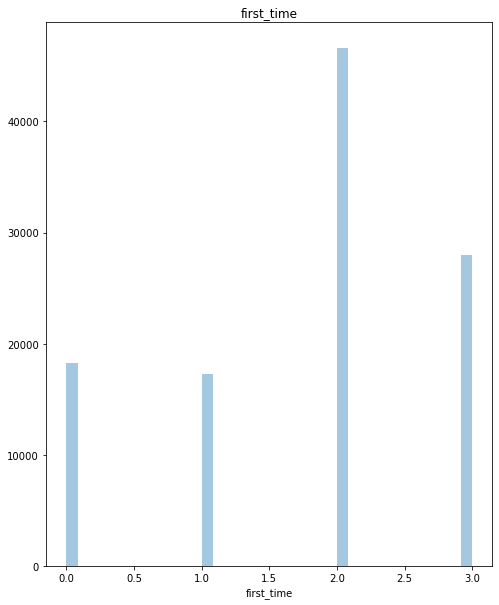

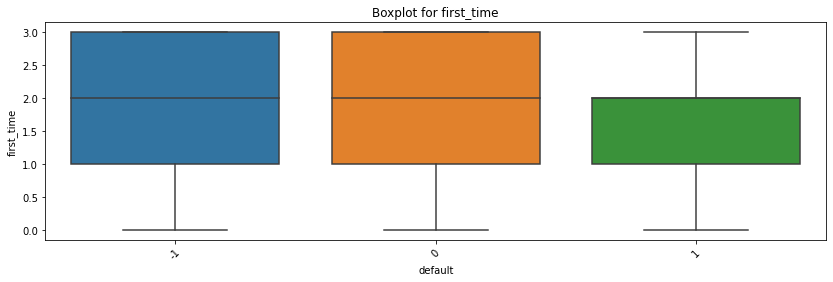

count    110148.000000
mean          1.765570
std           1.010151
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: first_time, dtype: float64


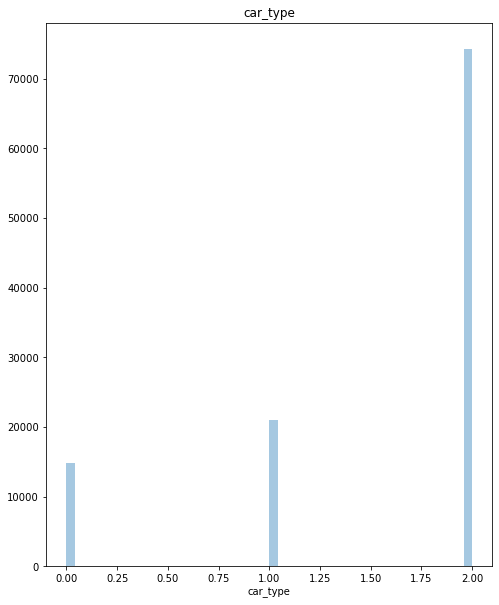

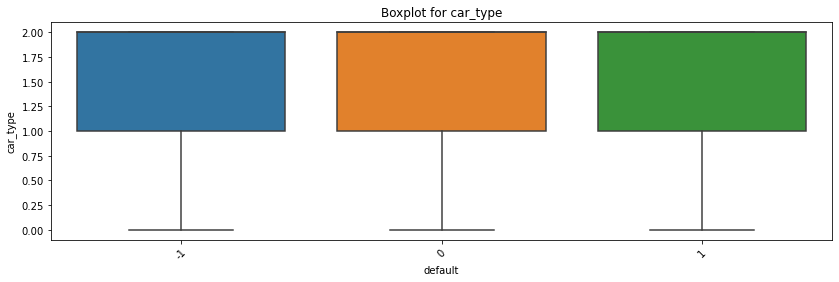

count    110148.000000
mean          1.539638
std           0.719771
min           0.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           2.000000
Name: car_type, dtype: float64


In [42]:
for i in cat_cols:
    plt.figure()
    sns.distplot(data[i], kde = False, rug=False)
    plt.title(i)
    get_boxplot(i)
    print(data[i].describe())
    plt.show()
    

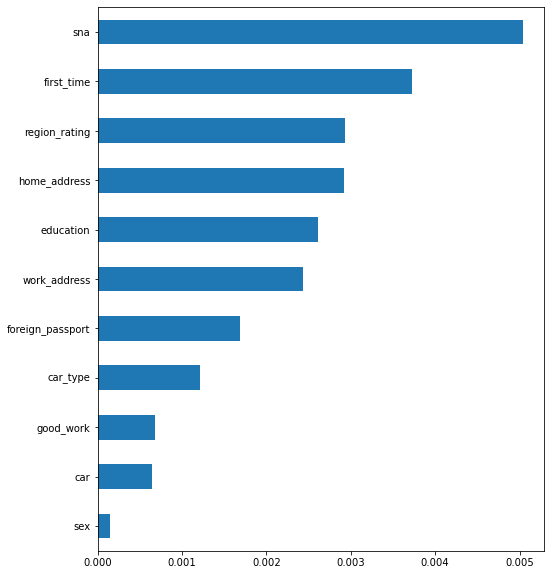

In [43]:
imp_cat = pd.Series(mutual_info_classif(data[bin_cols + cat_cols], data['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')


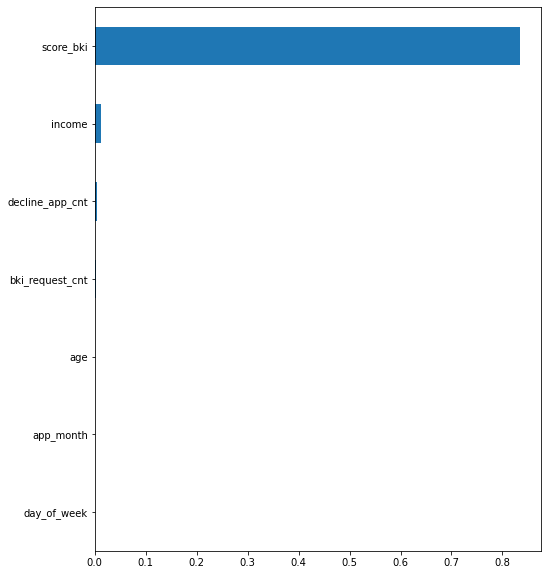

In [44]:
imp_cat = pd.Series(mutual_info_classif(data[num_cols], data['default'],
                                     discrete_features =True), index = num_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [45]:
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

In [46]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73799 entries, 36349 to 110147
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   client_id         73799 non-null  int64         
 1   app_date          73799 non-null  datetime64[ns]
 2   education         73799 non-null  int32         
 3   sex               73799 non-null  int32         
 4   age               73799 non-null  int64         
 5   car               73799 non-null  int32         
 6   car_type          73799 non-null  int64         
 7   decline_app_cnt   73799 non-null  int64         
 8   good_work         73799 non-null  int64         
 9   score_bki         73799 non-null  float64       
 10  bki_request_cnt   73799 non-null  int64         
 11  region_rating     73799 non-null  int64         
 12  home_address      73799 non-null  int64         
 13  work_address      73799 non-null  int64         
 14  income           

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36349 entries, 0 to 36348
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   client_id         36349 non-null  int64         
 1   app_date          36349 non-null  datetime64[ns]
 2   education         36349 non-null  int32         
 3   sex               36349 non-null  int32         
 4   age               36349 non-null  int64         
 5   car               36349 non-null  int32         
 6   car_type          36349 non-null  int64         
 7   decline_app_cnt   36349 non-null  int64         
 8   good_work         36349 non-null  int64         
 9   score_bki         36349 non-null  float64       
 10  bki_request_cnt   36349 non-null  int64         
 11  region_rating     36349 non-null  int64         
 12  home_address      36349 non-null  int64         
 13  work_address      36349 non-null  int64         
 14  income            3634

In [48]:
X_cat = OneHotEncoder(sparse = False).fit_transform(train_data[cat_cols].values)
X_num = StandardScaler().fit_transform(train_data[num_cols].values)

In [49]:
X = np.hstack([X_num, train_data[bin_cols].values, X_cat])
Y = train_data['default'].values

In [50]:
pd.DataFrame(X).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       73799 non-null  float64
 1   1       73799 non-null  float64
 2   2       73799 non-null  float64
 3   3       73799 non-null  float64
 4   4       73799 non-null  float64
 5   5       73799 non-null  float64
 6   6       73799 non-null  float64
 7   7       73799 non-null  float64
 8   8       73799 non-null  float64
 9   9       73799 non-null  float64
 10  10      73799 non-null  float64
 11  11      73799 non-null  float64
 12  12      73799 non-null  float64
 13  13      73799 non-null  float64
 14  14      73799 non-null  float64
 15  15      73799 non-null  float64
 16  16      73799 non-null  float64
 17  17      73799 non-null  float64
 18  18      73799 non-null  float64
 19  19      73799 non-null  float64
 20  20      73799 non-null  float64
 21  21      73799 non-null  float64
 22

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=RANDOM_SEED)

In [52]:
def train_model(X, Y):
    model = LogisticRegression(max_iter=500)
    model.fit(X_train, y_train)
    return model

def show_model_result(model, X_valid, y_valid):
    probs = model.predict_proba(X_valid)
    probs = probs[:,1]


    fpr, tpr, threshold = roc_curve(y_valid, probs)
    roc_auc = roc_auc_score(y_valid, probs)

    plt.figure()
    plt.plot([0, 1], label='Baseline', linestyle='--')
    plt.plot(fpr, tpr, label = 'Regression')
    plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()



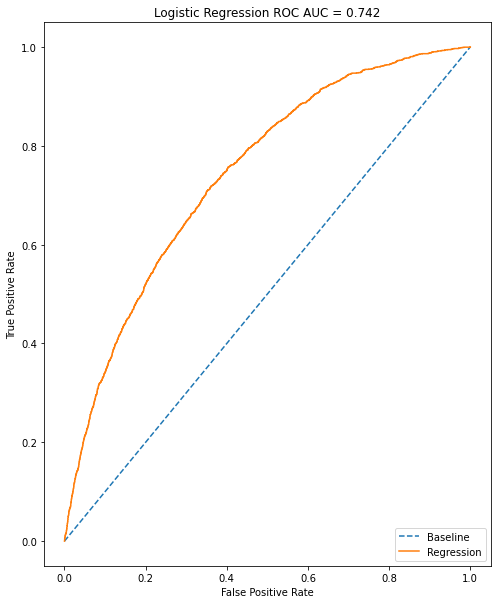

In [53]:

model = train_model(X_train, y_train)
show_model_result(model, X_test, y_test)

In [54]:
# запускаем GridSearch на небольшом кол-ве итераций max_iter=50 и с достаточно большой дельтой останова tol1e-3
# чтобы получить оптимальные параметры модели в первом приближении
model = LogisticRegression(random_state=RANDOM_SEED)
iter_ = 50
epsilon_stop = 1e-3
param_grid = [
    {'penalty': ['l1'], 
     'solver': ['liblinear', 'lbfgs'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['l2'], 
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
    {'penalty': ['none'], 
     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
     'class_weight':['none', 'balanced'], 
     'multi_class': ['auto','ovr'], 
     'max_iter':[iter_],
     'tol':[epsilon_stop]},
]
gridsearch = GridSearchCV(model, param_grid, scoring='f1', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
model = gridsearch.best_estimator_
##печатаем параметры
best_parameters = model.get_params()
for param_name in sorted(best_parameters.keys()):
        print('\t%s: %r' % (param_name, best_parameters[param_name]))
    ##печатаем метрики
preds = model.predict(X_test)


	C: 1.0
	class_weight: 'balanced'
	dual: False
	fit_intercept: True
	intercept_scaling: 1
	l1_ratio: None
	max_iter: 50
	multi_class: 'auto'
	n_jobs: None
	penalty: 'l2'
	random_state: 42
	solver: 'saga'
	tol: 0.001
	verbose: 0
	warm_start: False


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [55]:
print('Accuracy: %.4f' % accuracy_score(y_test, preds))
print('Precision: %.4f' % precision_score(y_test, preds))
print('Recall: %.4f' % recall_score(y_test, preds))
print('F1: %.4f' % f1_score(y_test, preds))

Accuracy: 0.6701
Precision: 0.2255
Recall: 0.6836
F1: 0.3391


In [56]:
# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packa

Лучшее Penalty: l2
Лучшее C: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


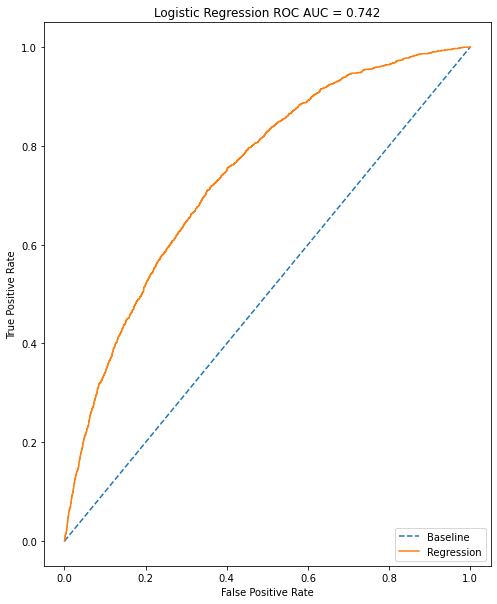

In [57]:
show_model_result(best_model, X_test, y_test)

In [58]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36349 entries, 0 to 36348
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   client_id         36349 non-null  int64         
 1   app_date          36349 non-null  datetime64[ns]
 2   education         36349 non-null  int32         
 3   sex               36349 non-null  int32         
 4   age               36349 non-null  int64         
 5   car               36349 non-null  int32         
 6   car_type          36349 non-null  int64         
 7   decline_app_cnt   36349 non-null  int64         
 8   good_work         36349 non-null  int64         
 9   score_bki         36349 non-null  float64       
 10  bki_request_cnt   36349 non-null  int64         
 11  region_rating     36349 non-null  int64         
 12  home_address      36349 non-null  int64         
 13  work_address      36349 non-null  int64         
 14  income            3634

In [59]:
X_cat = OneHotEncoder(sparse = False).fit_transform(test_data[cat_cols].values)
X_num = StandardScaler().fit_transform(test_data[num_cols].values)
X = np.hstack([X_num, test_data[bin_cols].values, X_cat])

In [60]:
Y = test_data['default']


In [61]:

predict_submission_default_proba = model.predict_proba(X)[:,1]

In [62]:
submission = pd.DataFrame()
submission["client_id"] = test_data.client_id
submission["default"] = predict_submission_default_proba
submission.sample(10)

,client_id,default
7065,86860,0.175454
27912,3557,0.055834
16666,83961,0.093342
31443,52109,0.305296
35426,16517,0.246046
36248,50842,0.205242
6868,54467,0.505690
8581,92023,0.160153
18910,14042,0.084233
11640,104506,0.105332


In [63]:
submission.to_csv('./submission.csv', index=False)